# Tutorial for `sc_drv`

`sc_drv` is a [Python](http://python.org) module that implement the DRV processes developed on top of [Scikit-Criteria](http://scikit-criteria.org).

**Authors**

-   Juan B. Cabral ([IATE-OAC-CONICET](https://iate.oac.uncor.edu),
    [FCEIA-UNR](https://web.fceia.unr.edu.ar/es/)) <jbc.develop@gmail.com>
-   Nadia A. Luczywo ([LIMI-FCEFyN-UNC](http://www.portal.efn.uncor.edu),
    [FCE-UNC](http://www.eco.unc.edu.ar/),
    [SECyT-UNC](https://www.unc.edu.ar/ciencia-y-tecnolog%C3%ADa/))
    <nluczywo@gmail.com>
-   José L. Zanazzi ([LIMI-FCEFyN-UNC](http://www.portal.efn.uncor.edu))
    <jl.zanazzi@gmail.com>


## What is DRV Processes?

DRV processes have been developed to support Group Decision
Making. They are applicable to the cases in which
all members of the group operate in the same organization and, therefore,
they must share organizational values, knowledge and preferences.
Assumes that it is necessary to generate agreement on the preferences of
group members. 

In [1]:
%matplotlib inline

import numpy as np

from sc_drv import DRVProcess

In [2]:
wmtx = [
    [1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.5, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.5, 2.0, 1.2, 1.5, 1.0, 1.5, 1.0],
    [1.5, 1.5, 1.2, 1.5, 1.2, 1.0, 1.0],
    [2.0, 1.5, 1.0, 1.0, 1.1, 1.0, 1.0]]

abc = [
    # MO
    [[2.5, 2.0, 1.0],
     [0.5, 3.0, 1.0],
     [2.5, 2.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 4.0, 1.0],
     [6.0, 5.0, 1.0]],

    # COSTO
    [[1.0, 1.0, 1.0],
     [1.0, 1.0, 1.0],
     [3.0, 2.5, 1.0],
     [1.4, 1.3, 1.0],
     [2.5, 2.0, 1.0],
     [0.5, 0.5, 1.0]],

    # EXP
    [[3.0, 2.5, 1.0],
     [2.4, 1.2, 1.0],
     [1.0, 1.0, 1.0],
     [5.0, 4.0, 1.0],
     [1.5, 2.0, 1.0],
     [1.0, 1.0, 1.0]],

    # FLOTA
    [[0.67, 3.0, 1.0],
     [0.9, 2.1, 1.0],
     [1.2, 4.0, 1.0],
     [1.5, 2.0, 1.0],
     [0.9, 4.4, 1.0],
     [1.5, 2.0, 1.0]],

    # MEJ SERV
    [[1.5, 2.0, 1.0],
     [1.0, 2.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.5, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0]],

    # HyS
    [[1.5, 4.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.0, 3.0, 1.0],
     [1.2, 4.0, 1.0],
     [1.1, 3.0, 1.0]],

    # trat
    [[2.0, 1.5, 1.0],
     [1.0, 1.0, 1.0],
     [3.0, 1.0, 1.0],
     [2.0, 1.2, 1.0],
     [4.0, 1.0, 1.0],
     [1.5, 1.1, 1.0]]
]

abc_c = [
            # MO
            np.array([
                [1.5, 3.0, 1.0],
                [1.0, 3.0, 1.0],
                [0.833, 3.6, 1.0],
                [1.1, 2.5, 1.0],
                [1.0, 3.0, 1.0],
                [1.2, 3.0, 1.0]]),

            # COSTO
            np.array([
                [1.1, 1.1, 1.0],
                [1.2, 1.5, 1.0],
                [1.1, 2.0, 1.0],
                [1.1, 1.2, 1.0],
                [1.2, 1.1, 1.0],
                [1.1, 1.5, 1.0]]),

            # EXP
            np.array([
                [1.1, 2.0, 1.0],
                [1.0, 1.5, 1.0],
                [1.1, 2.0, 1.0],
                [2.1, 2.0, 1.0],
                [1.5, 1.5, 1.0],
                [1.2, 3.0, 1.0]])] + abc[3:]

In [3]:
dec = DRVProcess(njobs=1)
dec

DRVProcess(climit=0.25, ntest='shapiro', ntest_kwargs=None, alpha_norm=0.01, alpha_rank=0.05, njobs=1, agg_only_consensus=True)

$$\alpha$$

In [14]:
from IPython.display import Image, HTML
result = dec.decide(weights=wmtx, abc=abc)
result

Normal Test (ntest),shapiro
Alpha for Normal Test (alpha_norm),0.01
Alpha for T-Test (alpha_rank),0.05
Consensus Limit (climit),0.25
Number of Participants (N_),6
Number of Alternatives (I_),3
Number of Criteria (J_),7
Strict Preference (strict_preference_),False
Consensus (consensus),False
N-Test Reject H0 (ntest_reject_h0_),False
Rank Check (rank_check_results_resume_),False


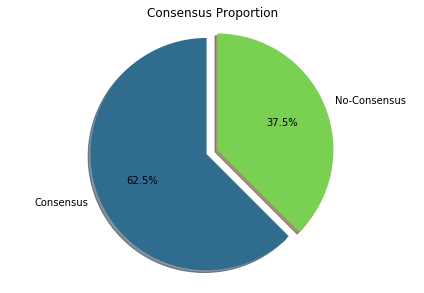

In [15]:
result.plot.consensus(plot_kwargs={"startangle": 90, "shadow": 1});

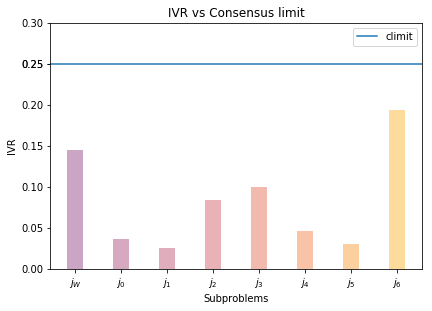

In [6]:
ax = result.plot.ivr(cmap="inferno")

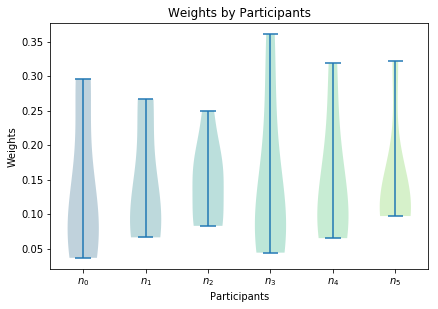

In [7]:
result.plot.weights_by_participants(ptype="violin")

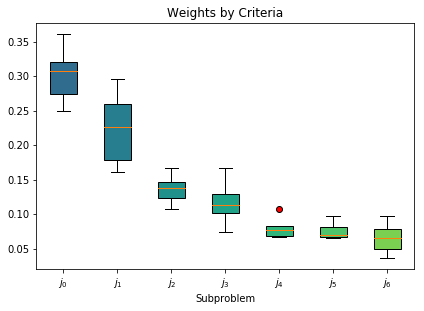

In [8]:
ax = result.plot.weights_by_subproblems()

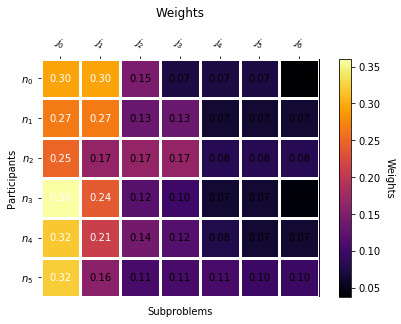

In [9]:
ax = result.plot.weight_heatmap(cmap="inferno")

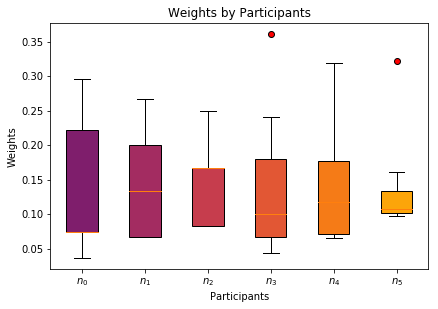

In [10]:
ax = result.plot.weights_by_participants(ptype="box", cmap="inferno")

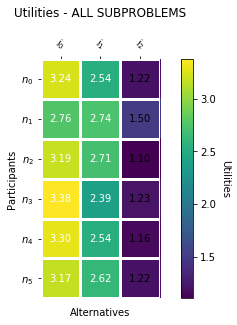

In [11]:
ax = result.plot.utilities_heatmap()

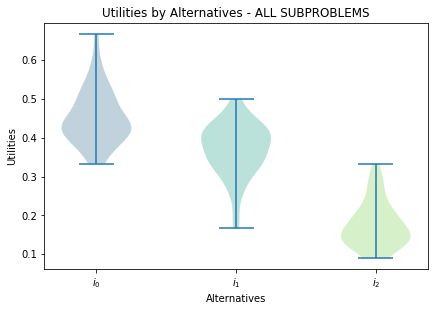

In [12]:
ax = result.plot.utilities_by_alternatives(subproblem=None, ptype="violin")

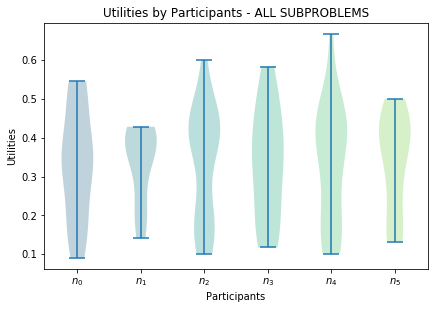

In [13]:
result.plot.utilities_by_participants(subproblem=None, ptype="violin")

## References

-   Zanazzi, J. L., Gomes, L. F. A. M., & Dimitroff, M. (2014). Group decision
    making applied to preventive maintenance systems. Pesquisa Operacional,
    34(1), 91-105.
-   Cabral, J. B., Luczywo, N. A., & Zanazzi, J. L. (2016). Scikit-Criteria:
    colección de métodos de análisis multi-criterio integrado al stack
    científico de Python. In XIV Simposio Argentino de Investigación Operativa
    (SIO 2016)-JAIIO 45 (Tres de Febrero, 2016).